In [3]:
import math
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import collections
from numpy import linalg
from collections import Counter
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import re
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")
from IPython.display import clear_output

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# folder_path = '/content/drive/My Drive/archive'
# os.chdir(folder_path)
# !ls

# Import data
df = pd.read_csv('data/Monday_new_scraping_data_filtered.csv')
#df2 = pd.read_csv('articles2.csv')
#df3 = pd.read_csv('articles3.csv')

# Merge data into one dataframe
#frames = [df1, df2, df3]
#data = pd.concat(frames)
#display(data.head())
# Convert data column into datetime
# df['date'] = pd.to_datetime(df['date'])
columns_to_drop = ['Unnamed: 0', 'date', 'year', 'month', 'url']
df = df.drop(columns=columns_to_drop)
df = df.head(500)

In [5]:
# Download NLTK resources
nltk.download('stopwords')

# Function to preprocess content column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, digits and white space using regex expression
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    # Apply stemming using NLTK PorterStemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

def preprocess_text_lower(text):
    # Converts to lowercase, removes symbols and stopword, but does not stem
    text = text.lower()
    # Remove special characters, digits and white space using regex expression
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'content' column
df['preprocessed_content'] = df['content'].apply(preprocess_text)
df['content_lowercase'] = df['content'].apply(preprocess_text_lower)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus = df['preprocessed_content'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X = X.toarray()
tfidf_matrix = pd.DataFrame(X)
tfidf_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,23859,23860,23861,23862,23863,23864,23865,23866,23867,23868
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
tfidf_matrix.shape

(443, 23869)

In [8]:
X = tfidf_matrix.values
kmeans = KMeans(n_clusters=11, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_

In [9]:
display(labels)

array([ 1,  8,  1,  0,  1,  8,  1,  1,  9,  1,  1,  5,  1,  5,  1,  9,  8,
        8,  8,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  0,  1,
        1,  0,  3, 10,  1,  3,  9,  2,  1,  3,  9,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  9,  1,  9,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  5,  1,  1,  1,  9,  0,  1,  9,  9,  9,  1,  9,
        0,  3,  9,  9,  3,  0,  0,  1,  3,  1,  1,  1,  9,  9,  1,  9,  1,
        1,  5,  0,  1,  1,  9,  8,  9,  8,  5,  3,  3,  5,  1,  8,  8,  8,
        8,  8,  8,  8,  1,  0,  2,  0, 10,  1,  1,  1,  0,  0,  1,  3,  3,
       10,  3,  0,  3,  1,  3,  1,  1,  9,  1,  5,  3,  3,  1,  3, 10,  1,
        1,  3,  5,  3,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  8,
        9,  1,  9,  1,  8,  9,  8,  0,  2,  0,  3,  2,  3,  1,  3,  9,  5,
        8,  1, 10,  3,  1,  1,  1,  1,  1,  9,  2,  5,  1,  9,  1,  5,  3,
        3,  3,  9,  1,  3,  5, 10,  9,  3,  9,  3,  1,  9,  1,  5,  9,  0,
        1,  3,  3,  0,  9

In [10]:
# Create dataframe with cluster numbers as columns and individual articles as rows (500)
clustered_df = pd.DataFrame()

list_to_append = [] # Row of null values that can be appended to dataframe

for i in range(len(np.unique(labels))):
    clustered_df[str(i)] = ''
    list_to_append.append(np.nan)

# Looping through the cluster labels of the 500 articles
for i in range(len(labels)):
    # Initialize row with null values
    clustered_df.loc[len(clustered_df.index)] = list_to_append
    # Add article to the cluster it belongs to in the dataframe
    clustered_df.loc[i,str(labels[i])] = df.loc[i,'content_lowercase']

clustered_df.shape

(443, 11)

In [11]:
clustered_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,two women slapped hate crime charges forallege...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hamas freed israeli hostages nine children two...,NaN,NaN
2,NaN,oklahoma city thunder guard josh giddey report...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,washington large number white house reporters ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,end era notorious gambler barstool sports foun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# This DataFrame has only one row, and the same number of columns as there are clusters.
# Every column contains ALL the text of a given cluster.
text_cluster_df = pd.DataFrame()

list_to_append = [] # Row of null values that can be appended to dataframe

for i in range(clustered_df.shape[1]):
    text_cluster_df[str(i)] = ''
    list_to_append.append(np.nan)

# Initialize first row
text_cluster_df.loc[len(text_cluster_df.index)] = list_to_append

# text_cluster_df.head()

text = []
# Outer loop: The 26 clusters
for i in range(clustered_df.shape[1]):
    # Inner loop: The 500 rows
    for j in range(clustered_df.shape[0]):
        if (pd.notnull(clustered_df.loc[j,str(i)])):
            # If the field is not null, then append the text to be added for the given cluster
            text.append(clustered_df.loc[j,str(i)])
    text_cluster_df.loc[0, str(i)] =  ' '.join(text)
    text = []

In [13]:
text_cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,washington large number white house reporters ...,two women slapped hate crime charges forallege...,yearold florida man found dead apparent suicid...,ukraines counteroffensive disappointed many we...,learning personal finance challenging make lea...,time turn heat black friday cyber monday weeke...,watch live stream fox news full episodes reduc...,anew york politicianis calling resignation uni...,hamas freed israeli hostages nine children two...,good news new research shows used hospital cle...,record amount pricepinched holiday shoppers ex...


In [14]:
text_cluster_df.loc[0,'0']

'washington large number white house reporters snubbed president bidens press corps christmas parties thesecond year row prompting claims journalists punished coverage invitations pair traditional media parties one tv teams held friday another print radio reporters scheduled dec went approximately two weeks ago midday monday secondtier invites delivered exclusions impact diverse group outlets including post reported extensively bidens links tohis son brothers foreign business dealings well reporters known sharp questions work democratsupporting titles youre hosting reception press invite entire press corps call private party friends said one snubbed longtime white house reporter works large liberalleaning outlet parties offer intimate interactions president informal opportunities schmooze officials champagne east room well lavish buffets shellfish desserts state dining room sort soft access press corps struggles get hardnews events biden featured aprescreening initiativethat continues 

In [15]:
# WORDCLOUD
wordclouds = []
for i in range(text_cluster_df.shape[1]):

    text = text_cluster_df.loc[0,str(i)]

    # Create and generate a word cloud image:
    # wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # plt.imshow(wordcloud, interpolation='bilinear')
    # plt.axis("off")
    # plt.show()

    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(text)
    wordclouds.append(wordcloud)
    # plt.figure()
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()

In [16]:
# plt.figure()
# plt.imshow(wordclouds[2], interpolation="bilinear")
# plt.axis("off")
# plt.show()

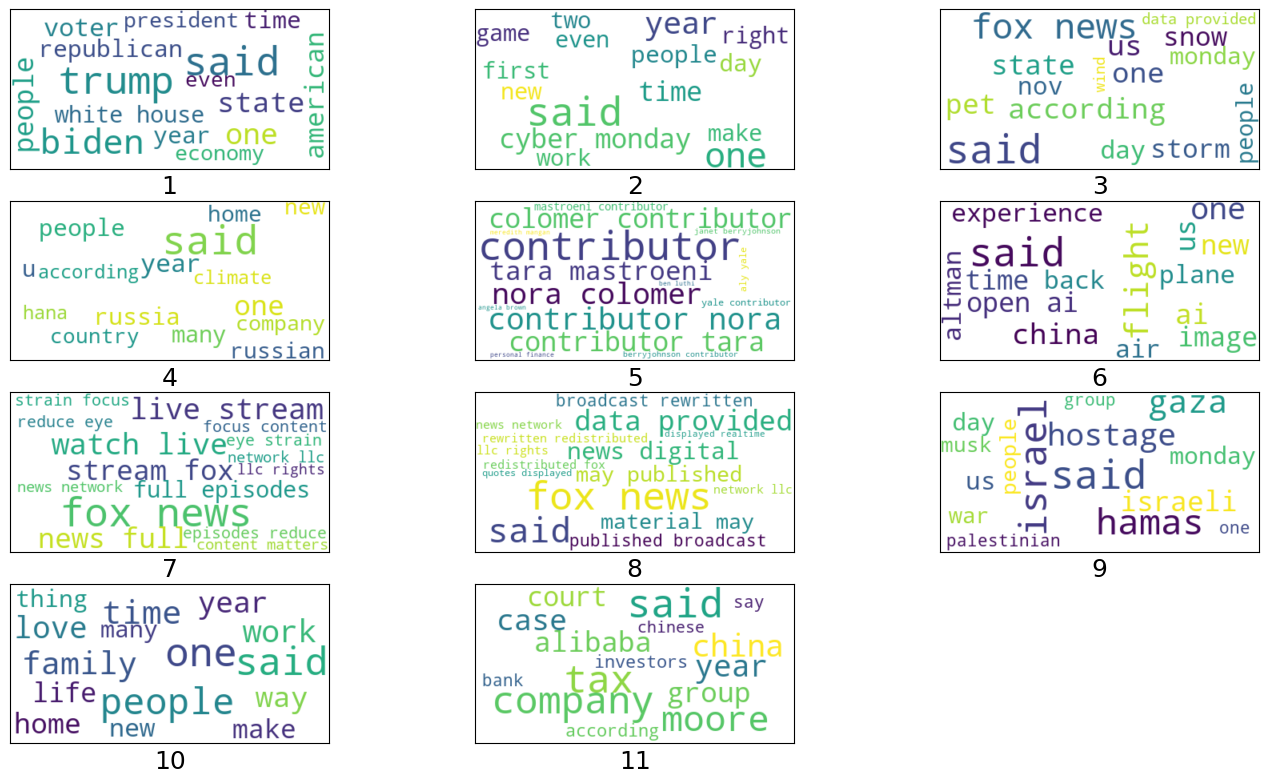

In [18]:
plt.figure(figsize=(17, 17))
# plt.subplots_adjust(hspace=0.1)
# plt.suptitle("Wordclouds", fontsize=18, y=0.95)
for n, cloud in enumerate(wordclouds):
    # add a new subplot iteratively
    ax = plt.subplot(7, 3, n + 1)
    ax.imshow(cloud, interpolation="bilinear")
    ax.set_xlabel(str(n+1), fontsize=18)
    plt.xticks([])
    plt.yticks([])

plt.savefig('figures/wordclouds-withlib.png', bbox_inches='tight', pad_inches=0.25)